In [40]:
# get all files from the data directory
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_files = [f for f in os.listdir('data') if f.endswith('.csv')]
total_data = pd.DataFrame()

csv_ground_truth = pd.read_csv('ground_truth/bm25_cut_10_score_descr_EXTENDED.csv')

for file in csv_files:
    data = pd.read_csv('data/' + file, index_col=0)
    total_data = total_data.append(data)

cs_sinppets = total_data.filter(regex='^CS_S_.*')
snippets_ground_truths = csv_ground_truth[["new_snippet_id", "score_descr_mapped10"]]
no_cs_sinppets = total_data.filter(regex='^S_.*')
cs_credibility_helpful_ratings = total_data['postTsk_CREDISCORE_CREDIBILITY_HELPFUL']
cs_visually_understandable_ratings = total_data['postTsk_CREDISCORE_VISUALLY_UNDERSTANDABLE']
cs_category_is_good_ratings = total_data['postTsk_CREDISCORE_IS_CATEGORY_GOOD']
cs_category_is_enough_ratings = total_data['postTsk_CREDISCORE_IS_CATEGORIES_ENOUGH']
cs_color_is_helpful_ratings = total_data['postTsk_CREDISCORE_IS_COLOR_HELPFUL']
print(snippets_ground_truths)

    new_snippet_id  score_descr_mapped10
0              S_0                    10
1              S_1                    10
2              S_2                    10
3              S_3                    10
4              S_4                     9
..             ...                   ...
105           S_55                     0
106           S_56                     9
107           S_57                     1
108           S_58                     0
109           S_59                     4

[110 rows x 2 columns]


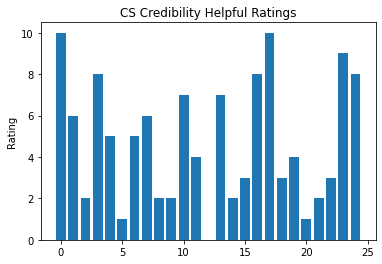

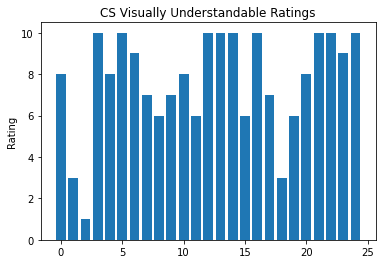

[23  2]


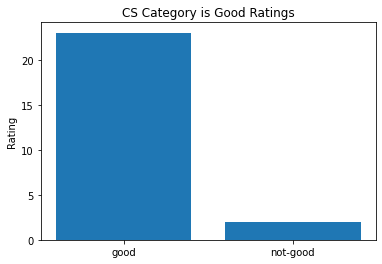

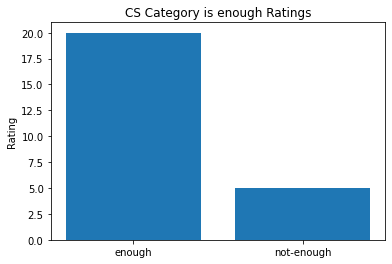

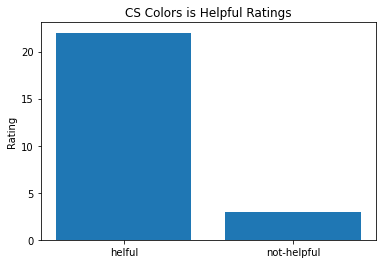

In [37]:
x_axis = list(range(len(cs_credibility_helpful_ratings)))

plt.figure()
plt.bar(x_axis, cs_credibility_helpful_ratings)
plt.title('CS Credibility Helpful Ratings')
plt.ylabel('Rating')
plt.show()

plt.figure()
plt.bar(x_axis, cs_visually_understandable_ratings)
plt.title('CS Visually Understandable Ratings')
plt.ylabel('Rating')
plt.show()

plt.figure()
plt.bar(["good", "not-good"], cs_category_is_good_ratings.value_counts().values)
plt.title('CS Category is Good Ratings')
plt.ylabel('Rating')   
plt.show()

plt.figure()
plt.bar(["enough", "not-enough"], cs_category_is_enough_ratings.value_counts().values)
plt.title('CS Category is enough Ratings')
plt.ylabel('Rating')   
plt.show()

plt.figure()
plt.bar(["helful", "not-helpful"], cs_color_is_helpful_ratings.value_counts().values)
plt.title('CS Colors is Helpful Ratings')
plt.ylabel('Rating')   
plt.show()

     topic                                      docId      score  \
0      102  en.noclean.c4-train.00962-of-07168.115130  24.917601   
1      102   en.noclean.c4-train.06310-of-07168.68525  24.038799   
2      102   en.noclean.c4-train.04886-of-07168.30115  23.413401   
3      102   en.noclean.c4-train.03835-of-07168.56757  23.059000   
4      102  en.noclean.c4-train.04312-of-07168.104973  22.671200   
..     ...                                        ...        ...   
105    143   en.noclean.c4-train.04751-of-07168.68033  18.861700   
106    143   en.noclean.c4-train.04845-of-07168.46924  18.822901   
107    143   en.noclean.c4-train.02256-of-07168.99843  18.821600   
108    143    en.noclean.c4-train.05532-of-07168.7697  18.733000   
109    143    en.noclean.c4-train.05499-of-07168.5860  18.720800   

                                              snippets  score_descr  \
0    The efficacy of tepid sponge bathing to reduce...    -0.004864   
1    Next The efficacy of tepid sponge ba

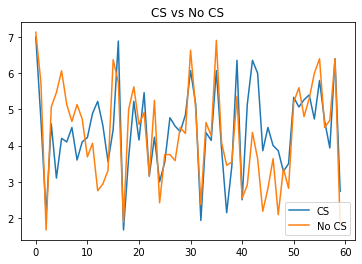

In [60]:
# average each column of cs_snippets
cs_snippets_means = cs_sinppets.mean()
no_cs_sinppets_means = no_cs_sinppets.mean()
# filter out all "nan values"
true_ratings = csv_ground_truth["score_descr_mapped10"]
true_ratings_filtered = csv_ground_truth[~csv_ground_truth["score_descr_mapped10"].astype(str).str.contains("nan")]
print(true_ratings_filtered)

# map the pandas dataframe to a simple array
cs_snippets_means_values = cs_snippets_means.values
no_cs_sinppets_means_values = no_cs_sinppets_means.values
x_snippet_ratings = list(range(len(cs_snippets_means_values)))

# plot both data sets as lines
plt.figure()
plt.title('CS vs No CS')
plt.plot(x_snippet_ratings, cs_snippets_means_values, label='CS', alpha=1)
plt.plot(x_snippet_ratings, no_cs_sinppets_means_values, label='No CS', alpha=1)
#plt.plot(x_snippet_ratings, true_ratings, label='True', alpha=1)
plt.legend()
plt.show()
